In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

# Load CSV file
df = pd.read_csv('/content/drive/MyDrive/ML/Week 1 work/car_purchase_dataset.csv')

In [13]:
# Display basic info
df.head()

,Age,Gender,AnnualSalary (USD),CreditScore,CarPurchaseAmount (USD)
0,25,1,50000,720,32000
1,32,0,62000,690,35000
2,45,1,85000,700,42000
3,23,0,40000,710,28000
4,38,1,78000,750,41000


In [14]:
# Describe data
df.describe()

,Age,Gender,AnnualSalary (USD),CreditScore,CarPurchaseAmount (USD)
count,71.000000,71.000000,71.000000,71.000000,71.000000
mean,38.535211,0.507042,74090.943662,718.816901,38201.366197
std,11.345019,0.503509,23696.362803,35.786793,9657.870477
min,21.000000,0.000000,32920.000000,655.000000,17095.000000
25%,29.000000,0.000000,56229.000000,690.000000,31500.000000
50%,37.000000,1.000000,71000.000000,718.000000,39252.000000
75%,48.000000,1.000000,94000.000000,740.500000,46978.000000
max,60.000000,1.000000,117996.000000,795.000000,54744.000000


<ipython-input-17-61444c5ed71d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AnnualSalary (USD)'])


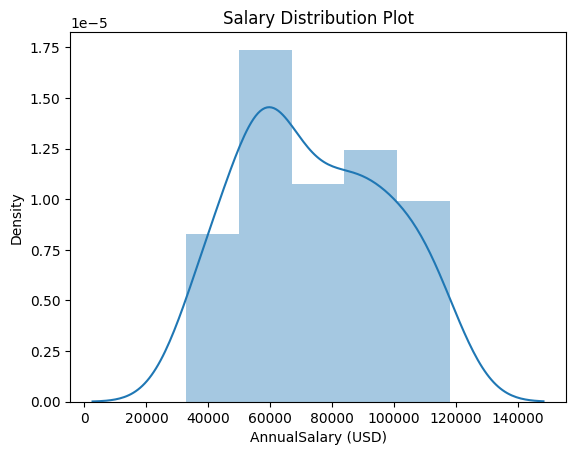

In [17]:
# Data distribution
plt.title('Salary Distribution Plot')
sns.distplot(df['AnnualSalary (USD)'])
#sns.displot(df_sal['Salary'])
plt.show()

In [5]:
# Encode 'Gender' using LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

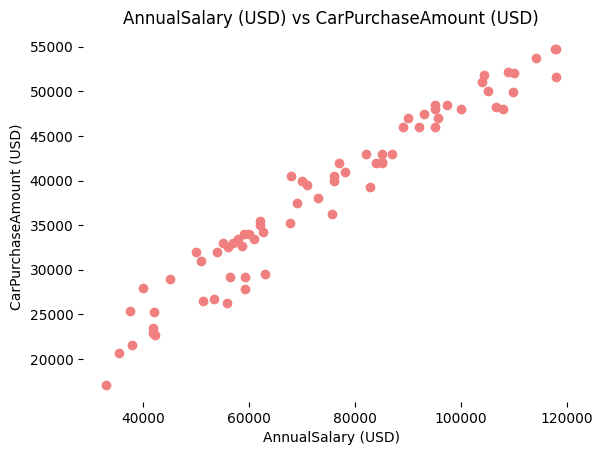

In [20]:
# Relationship between AnnualSalary (USD) and CarPurchaseAmount (USD)
plt.scatter(df['AnnualSalary (USD)'], df['CarPurchaseAmount (USD)'], color = 'lightcoral')
plt.title('AnnualSalary (USD) vs CarPurchaseAmount (USD)')
plt.xlabel('AnnualSalary (USD)')
plt.ylabel('CarPurchaseAmount (USD)')
plt.box(False)
plt.show()

In [30]:
# Features and target
X = df[['AnnualSalary (USD)']]
y = df[['CarPurchaseAmount (USD)']]

# X = df[['AnnualSalary (USD)', 'Age', 'CreditScore', 'Gender']]
# y = df[['CarPurchaseAmount (USD)']]

In [31]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [32]:
# Train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [33]:
# Predictions
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

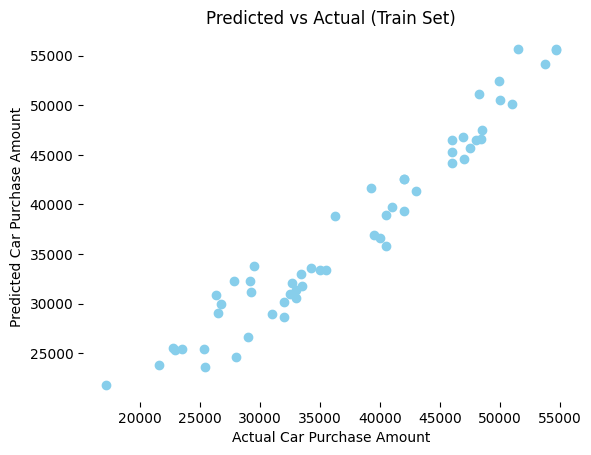

In [34]:
# Training set visualization
plt.scatter(y_train, y_pred_train, color='skyblue')
plt.title('Predicted vs Actual (Train Set)')
plt.xlabel('Actual Car Purchase Amount')
plt.ylabel('Predicted Car Purchase Amount')
plt.box(False)
plt.show()


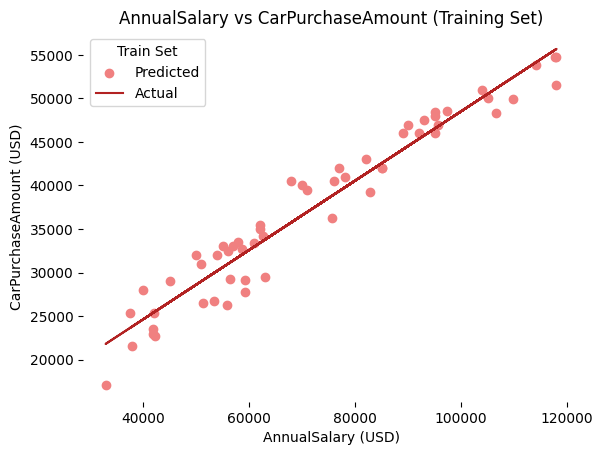

In [35]:
# Use AnnualSalary
plt.scatter(X_train['AnnualSalary (USD)'], y_train, color='lightcoral')
plt.plot(X_train['AnnualSalary (USD)'], y_pred_train, color='firebrick')
plt.title('AnnualSalary vs CarPurchaseAmount (Training Set)')
plt.xlabel('AnnualSalary (USD)')
plt.ylabel('CarPurchaseAmount (USD)')
plt.legend(['Predicted', 'Actual'], title='Train Set', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [ ]:
# Test set visualization
plt.scatter(y_test, y_pred_test, color='lightgreen')
plt.title('Predicted vs Actual (Test Set)')
plt.xlabel('Actual Car Purchase Amount')
plt.ylabel('Predicted Car Purchase Amount')
plt.box(False)
plt.show()

In [37]:
# Plotting only one predictor (AnnualSalary) for visualization
# plt.scatter(X_test['AnnualSalary (USD)'], y_test, color='green')
# plt.plot(X_train['AnnualSalary (USD)'], y_pred_train, color='firebrick')
# plt.title('AnnualSalary vs CarPurchaseAmount (Test Set)')
# plt.xlabel('AnnualSalary (USD)')
# plt.ylabel('CarPurchaseAmount (USD)')
# plt.legend(['Predicted', 'Actual'], title='Test Set', loc='best', facecolor='white')
# plt.box(False)
# plt.show()


In [12]:
# Print coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': regressor.coef_[0]
})
print(coef_df)

print(f"Intercept: {regressor.intercept_[0]:.2f}")

              Feature  Coefficient
0  AnnualSalary (USD)     0.404001
1                 Age   -10.610492
2         CreditScore    16.794738
3              Gender  -518.315707
Intercept: -3138.39
